In [1]:
import ipywidgets as widgets
from HARK.ConsumptionSaving.ConsPortfolioModel import SequentialPortfolioConsumerType
from HARK.utilities import plot_funcs

from simulate.parameters import LUCAS0
import math

In [2]:
LUCAS0["aNrmInitStd"] = 0.0

risky_expectations = {"RiskyAvg": 1.0175492133848216, "RiskyStd": 0.09283741339989003}

parameter_dict = LUCAS0.copy()

parameter_dict.update(risky_expectations)

PARAMS = parameter_dict  # a0h.parameters

PARAMS["aNrmInitMean"] = 1
PARAMS["aNrmInitStd"] = 0.00
PARAMS["T_sim"] = 5000
PARAMS["PermGroFac"] = [PARAMS["PermGroFac"]]
PARAMS["AgentCount"] = 2000
PARAMS["sim_common_Rrisky"] = False

# PARAMS['LivPrb'] = [1.0]
PARAMS["DiscFac"] = 0.99  # * 0.995 * .9

# PARAMS['TranShkStd'] = [1.0]

PARAMS["RiskyCount"] = 9


at = SequentialPortfolioConsumerType(**PARAMS)
at.track_vars += ["aNrm", "cNrm", "mNrm", "Risky", "Share", "aLvl", "pLvl"]
at.solve()

cFunc = at.solution[0].cFuncAdj
ShareFunc = at.solution[0].ShareFuncAdj

In [3]:
agent_parameters = PARAMS.copy()

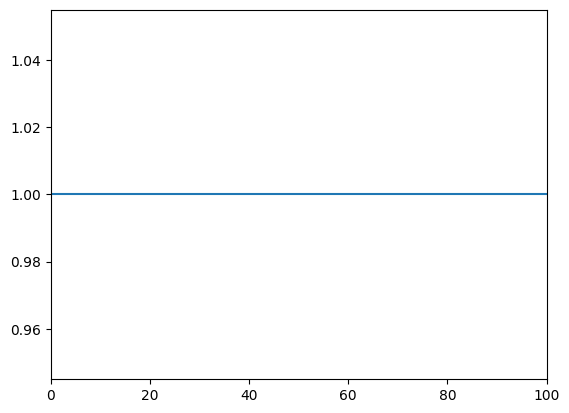

In [4]:
plot_funcs(ShareFunc, 0, 100)

In [5]:
dividend_growth_rate = 1.000203
dividend_std = 0.011983

def price_dividend_ratio_random_walk(
    DiscFac, CRRA, days_per_quarter=90
):

    # Assuming DiscFac in argument in quarterly
    DiscFac_daily = DiscFac ** (1.0 / days_per_quarter)

    dividend_shock_std = dividend_std / math.sqrt(dividend_growth_rate)

    subjective_return = (
        dividend_growth_rate ** (1 - CRRA)
        * DiscFac_daily
        * (dividend_shock_std**2 + 1) ** (CRRA * (CRRA - 1) / 2)
    )

    print("subjective_return: " + str(subjective_return))
    return subjective_return < 1

In [6]:
def portfolio_choice(CRRA=3.0, DiscFac=0.99):
    agent_parameters["CRRA"] = CRRA
    agent_parameters["DiscFac"] = DiscFac

    print("Solving...")

    agent = SequentialPortfolioConsumerType(**agent_parameters)
    agent.solve()

    print("Solved!")
    
    srle1 = price_dividend_ratio_random_walk(DiscFac, CRRA)
    
    print("subjective_return < 1?: " + str(srle1))

    plot_funcs(agent.solution[0].ShareFuncAdj, 0, 100)

In [9]:
widgets.interact(
    portfolio_choice,
    CRRA=(2, 10, 1),
    DiscFac=(0.5, 0.99, 0.02),
    continuous_update=False,
)

interactive(children=(IntSlider(value=3, description='CRRA', max=10, min=2), FloatSlider(value=0.99, descripti…

<function __main__.portfolio_choice(CRRA=3.0, DiscFac=0.99)>